<a href="https://colab.research.google.com/github/dariuschanyw/dssi-py/blob/main/NMSM_3_3_ABSA_ZeroShot_DCYW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise NMSM_3_3_ABSA_ZeroShot


*   Use the restaurant review data set from the workshop last week: trainset.pk
*   Select two restaurants (each with at least 100 reviews)
*   Apply ABSA on the two restaurants with aspect categories – food quality, service, ambiance, price/value, cleanliness, location, and general

You may use any model or technique learned in class.

Submit a pdf file (NMSM-D3-yourname.pdf) converted from your ipynb file including the results and your findings.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/PLP NMSM Workshop3/train.csv')
df_train

,restaurant_id,date,review_id,stars,text,Sentiment
0,tr70,2/11/2010,revtrain10455,4,I've been here many many times and have never ...,positive
1,tr70,3/7/2010,revtrain10456,4,"I was actually really impressed, even though I...",positive
2,tr70,3/11/2010,revtrain10457,4,Excellent. Can't say enough about the sampler...,positive
3,tr70,3/19/2010,revtrain10458,4,"This was my first time here, a fellow yelper r...",positive
4,tr70,7/10/2010,revtrain10459,4,I went to BJ's when I lived in California. Th...,positive
...,...,...,...,...,...,...
17928,ts3,4/19/2013,revtest8,2,I'll second the other reviewer that said for t...,negative
17929,ts4,6/4/2013,revtest9,1,Seriously I waited in the drive thru for like ...,negative
17930,ts4,1/20/2014,revtest10,2,I'm stuck between TWO and THREE stars. After a...,negative
17931,ts5,2/27/2011,revtest11,2,"Driving down 7th, I got reallllllly excited se...",negative


In [ ]:
value_counts = df_train['restaurant_id'].value_counts()
frequent_ids = value_counts[value_counts > 100]

frequent_rows = df_train[df_train['restaurant_id'].isin(frequent_ids.index)]

frequent_rows.restaurant_id.value_counts()

,count
restaurant_id,
tr218,1775
tr225,1206
tr215,1128
tr239,346
tr251,257
tr184,203
tr224,194
tr85,182
tr202,182


In [ ]:
df_tr172 = df_train[df_train['restaurant_id'] == 'tr172']
df_tr119 = df_train[df_train['restaurant_id'] == 'tr119']
df_tr119.head()

,restaurant_id,date,review_id,stars,text,Sentiment
995,tr119,2/17/2007,revtrain11760,5,I have only come here for the $1 soft serve. ...,positive
996,tr119,10/9/2007,revtrain11761,5,"4 years of college, Ive always ordered deliver...",positive
997,tr119,3/18/2010,revtrain11762,4,Not sure where the negative reviews are coming...,positive
998,tr119,10/5/2010,revtrain11763,5,This restaurant has changed management in the ...,positive
999,tr119,10/25/2010,revtrain11764,5,Been craving for good sichuan food in Pittsbur...,positive


In [ ]:
df_tr119 = df_tr119["text"]
print(type(df_tr119))

<class 'pandas.core.series.Series'>


In [ ]:
tr119_rev = df_tr119
tr119_rev

,text
995,I have only come here for the $1 soft serve. ...
996,"4 years of college, Ive always ordered deliver..."
997,Not sure where the negative reviews are coming...
998,This restaurant has changed management in the ...
999,Been craving for good sichuan food in Pittsbur...
...,...
14926,I am not a huge Chinese food eater. I never h...
14927,"I have only been here twice, and found the sau..."
14928,Since I am slowly making my way through all th...
14929,Food @ How Lee is decent. I ate here for the f...


In [ ]:
tr119_rev = tr119_rev.reset_index(drop=True)
example = tr119_rev[1]
print(example)

4 years of college, Ive always ordered delivery from this place.  The food is average but its served me well... 5 stars for my loyalty.


In [ ]:
!pip install transformers
from transformers import pipeline

In [ ]:
sa = pipeline("sentiment-analysis")

print(sa(example))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9996427297592163}]


In [ ]:
qa = pipeline("question-answering")

result = qa(question="What is this comment about?", context=example)
result

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.19850291311740875,
 'start': 66,
 'end': 85,
 'answer': 'The food is average'}

In [ ]:
result = qa(question="What food items are mentioned?", context=example)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}")

Answer: 'The food is average', score: 0.3901


In [ ]:
nli = pipeline("zero-shot-classification")

nli(
    example,
    candidate_labels=["food quality", "price", "service", "ambiance", "value", "cleanliness", "location"]
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': '4 years of college, Ive always ordered delivery from this place.  The food is average but its served me well... 5 stars for my loyalty.',
 'labels': ['food quality',
  'value',
  'service',
  'location',
  'price',
  'cleanliness',
  'ambiance'],
 'scores': [0.3754222095012665,
  0.29969921708106995,
  0.287344366312027,
  0.022001218050718307,
  0.007653126027435064,
  0.004432600922882557,
  0.003447268856689334]}

In [ ]:
nli(
    example,
    candidate_labels=["This is a positive comment on food.", "This is a negative comment on food.", "This is a neutral comment on food."],
)

{'sequence': '4 years of college, Ive always ordered delivery from this place.  The food is average but its served me well... 5 stars for my loyalty.',
 'labels': ['This is a positive comment on food.',
  'This is a neutral comment on food.',
  'This is a negative comment on food.'],
 'scores': [0.9757234454154968, 0.01886397786438465, 0.005412528291344643]}

In [ ]:
nli(
    "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.",
    candidate_labels=["food quality", "price", "service", "ambiance", "value", "cleanliness", "location", "general comment"]
)

{'sequence': "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.",
 'labels': ['value',
  'general comment',
  'food quality',
  'location',
  'ambiance',
  'service',
  'cleanliness',
  'price'],
 'scores': [0.381693959236145,
  0.16384708881378174,
  0.10804153978824615,
  0.10607818514108658,
  0.08041746914386749,
  0.06902056187391281,
  0.05475158989429474,
  0.03614957630634308]}

In [ ]:
for cat in ["food quality", "price", "service", "ambiance", "value", "cleanliness", "location", "general comment"]:
  res = nli(
    "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.",
      candidate_labels=[cat, 'not '+cat]
  )
  print(res)

{'sequence': "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.", 'labels': ['food quality', 'not food quality'], 'scores': [0.8521161079406738, 0.14788389205932617]}
{'sequence': "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.", 'labels': ['price', 'not price'], 'scores': [0.547887921333313, 0.4521120488643646]}
{'sequence': "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.", 'labels': ['service', 'not service'], 'scores': [0.5294439196586609, 0.4705560505390167]}
{'seque

In [ ]:
for cat in ["on food quality", "on price", "on service", "on ambiance", "on value", "on cleanliness", "on location", "in general"]:
  res = nli("I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.",
      candidate_labels=["A comment "+cat, "Not a comment "+cat]
  )
  print(res)

{'sequence': "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.", 'labels': ['A comment on food quality', 'Not a comment on food quality'], 'scores': [0.8781718015670776, 0.12182819098234177]}
{'sequence': "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.", 'labels': ['A comment on price', 'Not a comment on price'], 'scores': [0.748449444770813, 0.2515505254268646]}
{'sequence': "I've been to the Bellagio Buffet a few times, and it's always been good.  However, visiting over Thanksgiving this year and taking in the Buffet I found it even better, and easily the best Buffet I've enjoyed in Las Vegas.", 'labels': ['A comment on service', 'Not a com

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

tr119

In [ ]:
tr119_rev = df_tr119

def remove_long_reviews(series, max_length=250):
    return series[series.apply(lambda x: len(x) <= max_length)]

# Example usage:
tr119_rev = remove_long_reviews(tr119_rev, max_length=250)

In [ ]:
tr119_rev

,text
996,"4 years of college, Ive always ordered deliver..."
1013,Good. Spicy food.
1015,"Never had a bad meal here, we've gone many tim..."
1016,Really satisfied my craving for authentic Sich...
1020,One of my favorite spots for lunch. Nice big p...
1035,"I have been there twice, I think they have dif..."
1039,Lunch special is a great deal. Good food and r...
1042,Like it. Every time when I want some spicy Sze...
1045,Food was really good! Tastes a lot like real a...
1048,Try it if u want good Sichuan food. It's above...


In [ ]:
results_tr119 = []
cats = ["food quality", "price", "service", "ambiance", "value", "cleanliness", "location"] #, "general"]
scount = 0
for r in tr119_rev:
  for s in sent_tokenize(r):
    scount = scount + 1
    #first, find applicable categories
    labels = []
    for c in cats :
      yes = "It's a comment on "+c
      no = "It's not a comment on "+c
      res = nli(s, candidate_labels=[yes, no])
      label = res['labels'][0]
      if (res['scores'][0]>=0.9) & ("not" not in label):
        labels.append(c)
    if labels == []:
      labels.append('general')

    #next, find polarity for each detected category
    for l in labels:
      if l == "general":
        pos = "This is a positive comment in general"
        neg = "This is a negative comment in general"
        neu = "This is a neutral comment in general"
      else:
        pos = "This is a positive comment on " +l
        neg = "This is a negative comment on " +l
        neu = "This is a neutral comment on " +l
      res2 = nli(s, candidate_labels=[pos, neg, neu] )
      polarity = res2['labels'][0]
      results_tr119.append({"sentence":s, "cat":l, "polarity":polarity[10:13],
                       "polarity_score":res2['scores'][0]})

print(scount)

74


In [ ]:
results_tr119

[{'sentence': '4 years of college, Ive always ordered delivery from this place.',
  'cat': 'service',
  'polarity': 'pos',
  'polarity_score': 0.8637970089912415},
 {'sentence': '4 years of college, Ive always ordered delivery from this place.',
  'cat': 'value',
  'polarity': 'pos',
  'polarity_score': 0.730014979839325},
 {'sentence': '4 years of college, Ive always ordered delivery from this place.',
  'cat': 'location',
  'polarity': 'pos',
  'polarity_score': 0.8719659447669983},
 {'sentence': 'The food is average but its served me well... 5 stars for my loyalty.',
  'cat': 'food quality',
  'polarity': 'pos',
  'polarity_score': 0.825222909450531},
 {'sentence': 'The food is average but its served me well... 5 stars for my loyalty.',
  'cat': 'service',
  'polarity': 'pos',
  'polarity_score': 0.9569924473762512},
 {'sentence': 'The food is average but its served me well... 5 stars for my loyalty.',
  'cat': 'value',
  'polarity': 'pos',
  'polarity_score': 0.9579271674156189},
 

In [ ]:
df_results_tr119 = pd.DataFrame(results_tr119)
df_results_tr119.head()

,sentence,cat,polarity,polarity_score
0,"4 years of college, Ive always ordered deliver...",service,pos,0.863797
1,"4 years of college, Ive always ordered deliver...",value,pos,0.730015
2,"4 years of college, Ive always ordered deliver...",location,pos,0.871966
3,The food is average but its served me well... ...,food quality,pos,0.825223
4,The food is average but its served me well... ...,service,pos,0.956992


In [ ]:
df_results_tr119.to_csv('DTF-results_tr119.csv', index=False)

In [ ]:
summary = pd.crosstab(df_results_tr119['cat'], df_results_tr119['polarity'])

In [ ]:
df_summary = pd.DataFrame(summary)
df_summary

polarity,neg,neu,pos
cat,,,
ambiance,0,0,16
cleanliness,0,0,1
food quality,5,0,40
general,3,3,9
location,1,0,9
price,1,0,8
service,1,0,20
value,3,0,28


In [ ]:
#add two new columns into the table
df_summary["category"] = df_summary.index
df_summary["total"] = df_summary["pos"]+df_summary["neg"]+df_summary["neu"]
#represent overall sentiment for the categary based on num of pos/neg
df_summary["sentiment"] = np.round((df_summary["pos"]-df_summary["neg"])/(df_summary["neg"]+df_summary["pos"]),2)
df_summary

polarity,neg,neu,pos,category,total,sentiment
cat,,,,,,
ambiance,0,0,16,ambiance,16,1.00
cleanliness,0,0,1,cleanliness,1,1.00
food quality,5,0,40,food quality,45,0.78
general,3,3,9,general,15,0.50
location,1,0,9,location,10,0.80
price,1,0,8,price,9,0.78
service,1,0,20,service,21,0.90
value,3,0,28,value,31,0.81


In [ ]:
!pip install squarify
import squarify
import matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sentiment Heat Map of Restaurant Aspects')

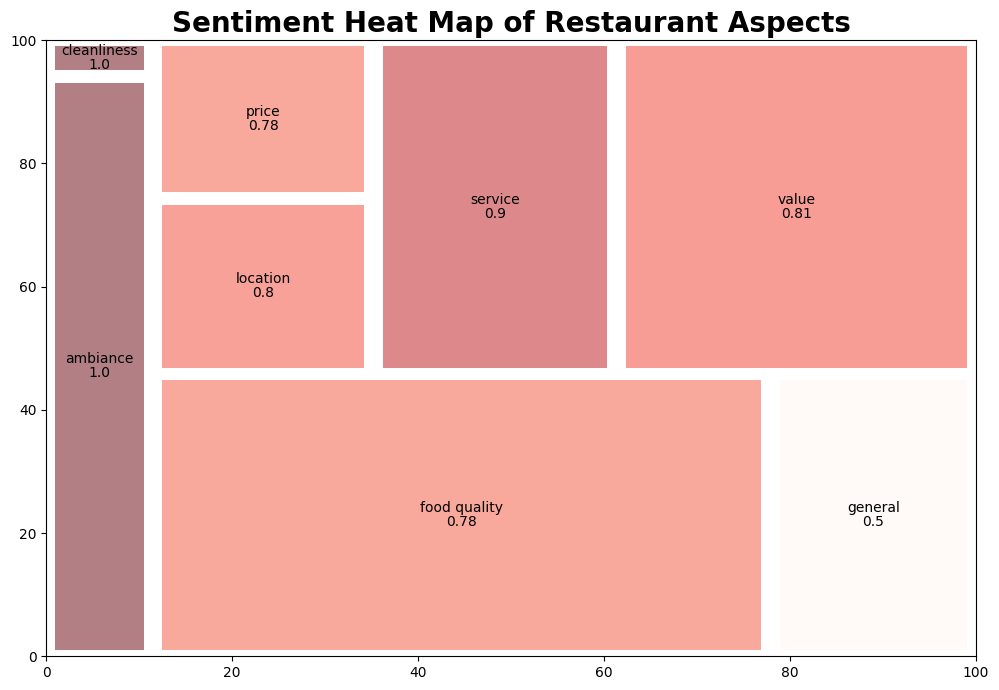

In [ ]:
norm = matplotlib.colors.Normalize(vmin=min(df_summary.sentiment), vmax=max(df_summary.sentiment))
colors = [matplotlib.cm.Reds(norm(value)) for value in df_summary.sentiment]

fig = plt.gcf()
fig.set_size_inches(12, 8)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
# Also used color intensity to reflect the sentiment value.
squarify.plot(label=df_summary.category,sizes=df_summary.total, value = df_summary.sentiment,color = colors, alpha=.5, pad =True)
plt.title("Sentiment Heat Map of Restaurant Aspects",fontsize=20,fontweight="bold")

tr172

In [ ]:
df_tr172 = df_tr172["text"]
tr172_rev = df_tr172

In [ ]:
tr172_rev = remove_long_reviews(tr172_rev, max_length=250)

In [ ]:
results_tr172 = []
cats = ["food quality", "price", "service", "ambiance", "value", "cleanliness", "location"] #, "general"]
scount = 0
for r in tr172_rev:
  for s in sent_tokenize(r):
    scount = scount + 1
    #first, find applicable categories
    labels = []
    for c in cats :
      yes = "It's a comment on "+c
      no = "It's not a comment on "+c
      res = nli(s, candidate_labels=[yes, no])
      label = res['labels'][0]
      if (res['scores'][0]>=0.9) & ("not" not in label):
        labels.append(c)
    if labels == []:
      labels.append('general')

    #next, find polarity for each detected category
    for l in labels:
      if l == "general":
        pos = "This is a positive comment in general"
        neg = "This is a negative comment in general"
        neu = "This is a neutral comment in general"
      else:
        pos = "This is a positive comment on " +l
        neg = "This is a negative comment on " +l
        neu = "This is a neutral comment on " +l
      res2 = nli(s, candidate_labels=[pos, neg, neu] )
      polarity = res2['labels'][0]
      results_tr172.append({"sentence":s, "cat":l, "polarity":polarity[10:13],
                       "polarity_score":res2['scores'][0]})

print(scount)

77


In [ ]:
df_results_tr172 = pd.DataFrame(results_tr172)
df_results_tr172.head()

,sentence,cat,polarity,polarity_score
0,the best patio in my opinion.,ambiance,pos,0.952350
1,the best patio in my opinion.,value,pos,0.871964
2,the best patio in my opinion.,location,pos,0.977751
3,such cool lights at night.,ambiance,pos,0.964057
4,the portions are hefty and tasty but their hap...,food quality,pos,0.951650


In [ ]:
summary = pd.crosstab(df_results_tr172['cat'], df_results_tr172['polarity'])

In [ ]:
df_summary = pd.DataFrame(summary)
df_summary

polarity,neg,neu,pos
cat,,,
ambiance,1,0,40
cleanliness,0,0,2
food quality,4,1,34
general,3,5,2
location,0,0,28
price,2,0,2
service,3,1,15
value,3,1,36


In [ ]:
#add two new columns into the table
df_summary["category"] = df_summary.index
df_summary["total"] = df_summary["pos"]+df_summary["neg"]+df_summary["neu"]
#represent overall sentiment for the categary based on num of pos/neg
df_summary["sentiment"] = np.round((df_summary["pos"]-df_summary["neg"])/(df_summary["neg"]+df_summary["pos"]),2)
df_summary

polarity,neg,neu,pos,category,total,sentiment
cat,,,,,,
ambiance,1,0,40,ambiance,41,0.95
cleanliness,0,0,2,cleanliness,2,1.00
food quality,4,1,34,food quality,39,0.79
general,3,5,2,general,10,-0.20
location,0,0,28,location,28,1.00
price,2,0,2,price,4,0.00
service,3,1,15,service,19,0.67
value,3,1,36,value,40,0.85


Text(0.5, 1.0, 'Sentiment Heat Map of Restaurant Aspects')

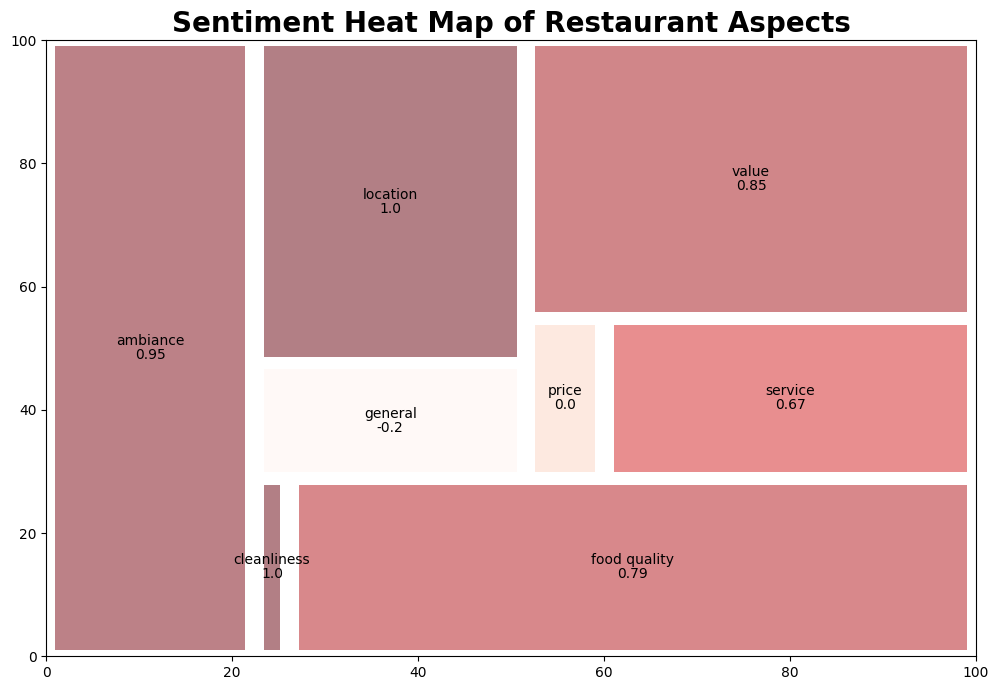

In [ ]:
norm = matplotlib.colors.Normalize(vmin=min(df_summary.sentiment), vmax=max(df_summary.sentiment))
colors = [matplotlib.cm.Reds(norm(value)) for value in df_summary.sentiment]

fig = plt.gcf()
fig.set_size_inches(12, 8)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
# Also used color intensity to reflect the sentiment value.
squarify.plot(label=df_summary.category,sizes=df_summary.total, value = df_summary.sentiment,color = colors, alpha=.5, pad =True)
plt.title("Sentiment Heat Map of Restaurant Aspects",fontsize=20,fontweight="bold")